In [1]:
import pandas as pd
import numpy as np

# 创建一个空的 DataFrame
performance_df = pd.DataFrame(columns=['Loss Function', 'Macro Precision', 'Macro Recall', 'Macro F1', 'Macro Accuracy', 'Macro TNR', 'Macro FPR'])

loss_list = ['CE', 'MAEL1', 'Focal0.5', 'Focal2']

for loss in loss_list:
    directory_path = loss

    # 从CSV文件加载混淆矩阵数据
    confusion_matrix_df = pd.read_csv(directory_path + '/confusion_matrix.csv')

    # 转换混淆矩阵数据为NumPy数组
    confusion_matrix = confusion_matrix_df.to_numpy()

    # 获取类别的总数
    num_classes = confusion_matrix.shape[0]

    # 初始化用于存储每个类别的性能指标的列表
    precision_list = []
    recall_list = []
    f1_list = []
    accuracy_list = []
    tnr_list = []
    fpr_list = []

    # 计算每个类别的性能指标
    for i in range(num_classes):
        TP = confusion_matrix[i, i]  # 真正例
        FP = np.sum(confusion_matrix[:, i]) - TP  # 假正例
        FN = np.sum(confusion_matrix[i, :]) - TP  # 假负例
        TN = np.sum(confusion_matrix) - (TP + FP + FN)  # 真负例

        # 计算准确率
        precision = TP / (TP + FP)
        precision_list.append(precision)

        # 计算召回率
        recall = TP / (TP + FN)
        recall_list.append(recall)

        # 计算F1分数
        f1 = 2 * (precision * recall) / (precision + recall)
        f1_list.append(f1)

        # 计算准确度
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        accuracy_list.append(accuracy)

        # 计算真负例率（TNR）
        tnr = TN / (TN + FP)
        tnr_list.append(tnr)

        # 计算假正例率（FPR）
        fpr = FP / (TN + FP)
        fpr_list.append(fpr)

    # 计算宏平均准确率、召回率和F1分数
    macro_precision = np.mean(precision_list)
    macro_recall = np.mean(recall_list)
    macro_f1 = np.mean(f1_list)
    macro_accuracy = np.mean(accuracy_list)
    macro_tnr = np.mean(tnr_list)
    macro_fpr = np.mean(fpr_list)

    # 添加性能指标到 DataFrame
    performance_df = performance_df.append({
        'Loss Function': loss,
        'Macro Precision': round(macro_precision, 2),
        'Macro Recall': round(macro_recall, 2),
        'Macro F1': round(macro_f1, 2),
        'Macro Accuracy': round(macro_accuracy, 2),
        'Macro TNR': round(macro_tnr, 2),
        'Macro FPR': round(macro_fpr, 2)
    }, ignore_index=True)

# 保存 DataFrame 到 CSV 文件
performance_df.to_csv('performance_metrics.csv', index=False)

# 打印或保存 DataFrame
performance_df


/tmp/ipykernel_1261486/4261472519.py:37: RuntimeWarning: invalid value encountered in double_scalars
  precision = TP / (TP + FP)


,Loss Function,Macro Precision,Macro Recall,Macro F1,Macro Accuracy,Macro TNR,Macro FPR
0,CE,0.39,0.39,0.39,0.88,0.93,0.07
1,MAEL1,NaN,0.29,NaN,0.86,0.92,0.08
2,Focal0.5,0.54,0.55,0.54,0.91,0.95,0.05
3,Focal2,0.53,0.53,0.53,0.91,0.95,0.05


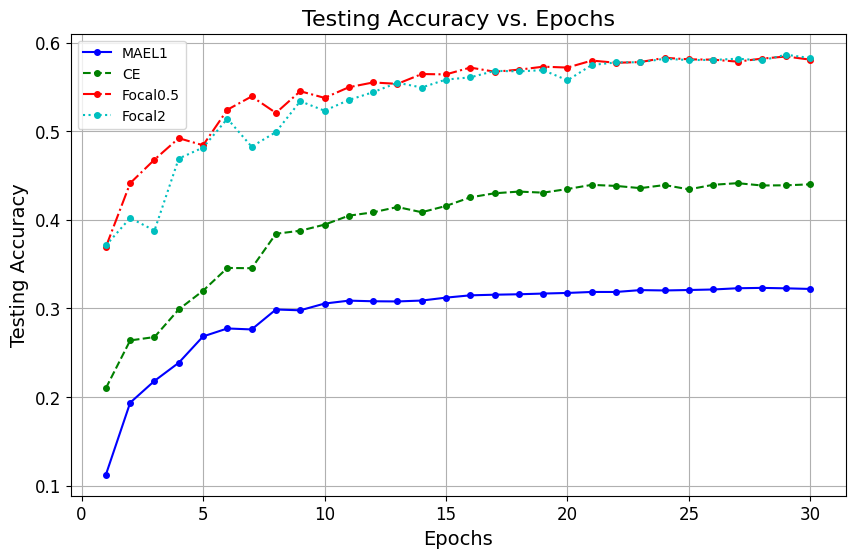

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

loss_list = ['MAEL1','CE' , 'Focal0.5', 'Focal2']
colors = ['b', 'g', 'r', 'c']  # 每个损失函数的颜色
linestyles = ['-', '--', '-.', ':']  # 不同线型

# 创建一个图形
plt.figure(figsize=(10, 6))

for i, loss in enumerate(loss_list):
    directory_path = loss

    # 从CSV文件加载测试集准确率
    testing_acc_df = pd.read_csv(directory_path + '/testing_acc.csv')

    # 从DataFrame中提取测试准确率数据
    testing_acc = testing_acc_df['0']

    # 绘制准确率曲线，包括颜色、线型、标记点和标签
    plt.plot(range(1, len(testing_acc) + 1), testing_acc, label=loss, color=colors[i], linestyle=linestyles[i], marker='o', markersize=4)

# 添加图例
plt.legend()

# 设置图形标题和坐标轴标签
plt.title('Testing Accuracy vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Testing Accuracy', fontsize=14)

# 添加网格线
plt.grid(True)

# 增加坐标轴刻度的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('testing_acc.png')

# 显示图形
plt.show()

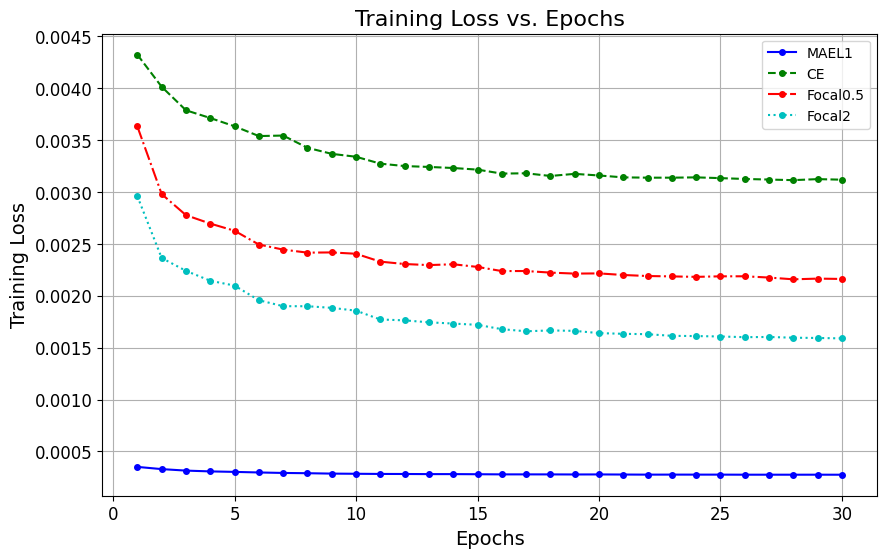

In [3]:
loss_list = ['MAEL1', 'CE', 'Focal0.5', 'Focal2']
colors = ['b', 'g', 'r', 'c']  # 每个损失函数的颜色
linestyles = ['-', '--', '-.', ':']  # 不同线型

# 创建一个图形
plt.figure(figsize=(10, 6))

for i, loss in enumerate(loss_list):
    directory_path = loss

    # 从CSV文件加载训练损失
    training_loss_df = pd.read_csv(directory_path + '/training_loss.csv')

    # 从DataFrame中提取训练损失数据
    training_loss = training_loss_df['0']

    # 绘制训练损失曲线，包括颜色、线型、标记点和标签
    plt.plot(range(1, len(training_loss) + 1), training_loss, label=loss, color=colors[i], linestyle=linestyles[i], marker='o', markersize=4)

# 添加图例
plt.legend()

# 设置图形标题和坐标轴标签
plt.title('Training Loss vs. Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)

# 添加网格线
plt.grid(True)

# 增加坐标轴刻度的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('training_loss.png')

# 显示图形
plt.show()